In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

In [4]:
def corpus_reader(file_path):
    sentences = []
    with open(file_path) as f:
        for line in f:
            sentences.append([nltk.tag.str2tuple(token) for token in line.strip().split(" ")])
    return sentences

In [6]:
def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, label in sent]

def sent2tokens(sent):
    return [token for token,label in sent]

In [8]:
train_sents = corpus_reader("./BKTreebank_LREC2018/train03-train_cleaned")
dev_sents = corpus_reader("./BKTreebank_LREC2018/train03-dev_cleaned")
test_sents = corpus_reader("./BKTreebank_LREC2018/test03_cleaned")
train_sents = train_sents + dev_sents

# Train data

In [10]:
label = [sent2labels(sent) for sent in train_sents]

In [13]:
label_ext = []
for l in label:
    label_ext.extend(l)
label_set = set(label_ext)
label_set

{'AV',
 'CC',
 'CD',
 'CL',
 'DT',
 'FW',
 'IN',
 'JJ',
 'LBKT',
 'MD',
 'NML',
 'NN',
 'NNP',
 'PFN',
 'PRP',
 'PUNCT',
 'RB',
 'RBKT',
 'TO',
 'UH',
 'VA',
 'VB',
 'WDT',
 'WP',
 'WRB'}

In [15]:
from collections import defaultdict
label_count = defaultdict(int)
for x in label_ext:
    label_count[x] += 1
for x in label_count:
    print(x,":",label_count[x])

NN : 27398
IN : 10064
MD : 3144
VB : 16628
VA : 1570
CD : 3116
RB : 8714
CL : 391
AV : 1384
PUNCT : 12377
JJ : 3470
NNP : 5934
DT : 3892
PFN : 638
CC : 2054
PRP : 1764
TO : 600
WP : 22
WRB : 116
NML : 213
UH : 20
LBKT : 359
RBKT : 360
FW : 3
WDT : 7


# Test data

In [16]:
test_label = [sent2labels(sent) for sent in test_sents]
test_label_ext = []
for l in test_label:
    test_label_ext.extend(l)
test_label_set = set(test_label_ext)
test_label_count = defaultdict(int)
for x in test_label_ext:
    test_label_count[x] += 1
for x in test_label_count:
    print(x,":",test_label_count[x])

RB : 1473
PUNCT : 1496
NN : 4369
VB : 2746
JJ : 821
CD : 519
CC : 217
IN : 1406
NNP : 782
PRP : 308
TO : 62
MD : 661
AV : 187
DT : 679
VA : 221
WRB : 17
CL : 90
PFN : 98
NML : 30
WP : 2
UH : 2
WDT : 1


# Graph label

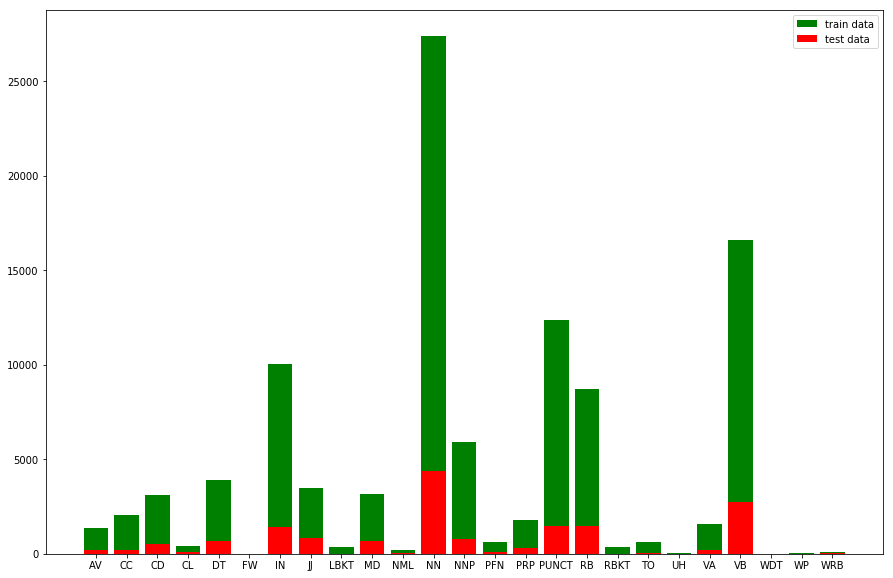

In [34]:
plt.figure(figsize=(15,10))
plt.bar(list(label_count.keys()),
       list(label_count.values()),
       color="green", label="train data")
plt.bar(list(test_label_count.keys()) ,
        list(test_label_count.values()),
        color="red",label="test data")
plt.legend()
plt.show()

# Sentence Length
## train data

In [35]:
length_sent_train = defaultdict(int)
for l in train_sents:
    length_sent_train[len(l)] += 1

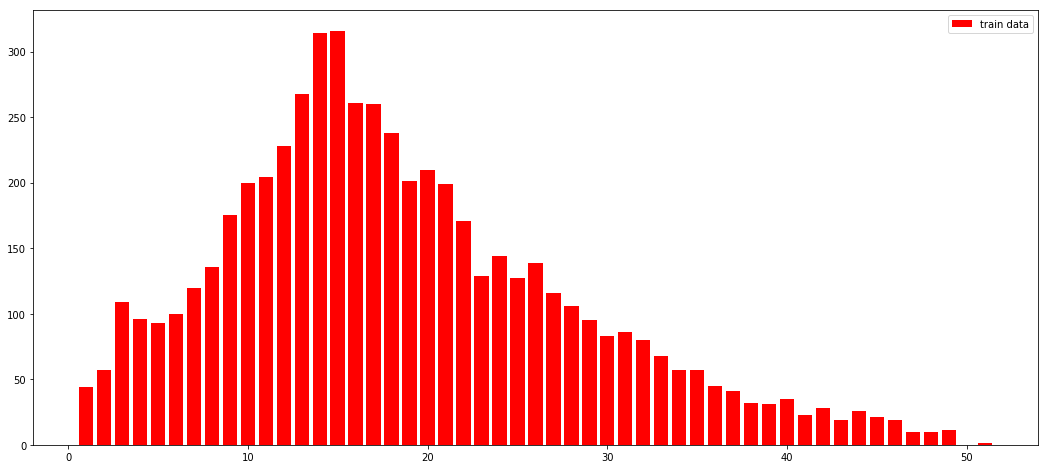

In [42]:
plt.figure(figsize=(18,8))
plt.bar(list(length_sent_train.keys()) ,
        list(length_sent_train.values()),
        color="red",label="train data")
plt.legend()
plt.show()

## test data

In [37]:
length_sent_test = defaultdict(int)
for l in test_sents:
    length_sent_test[len(l)] += 1

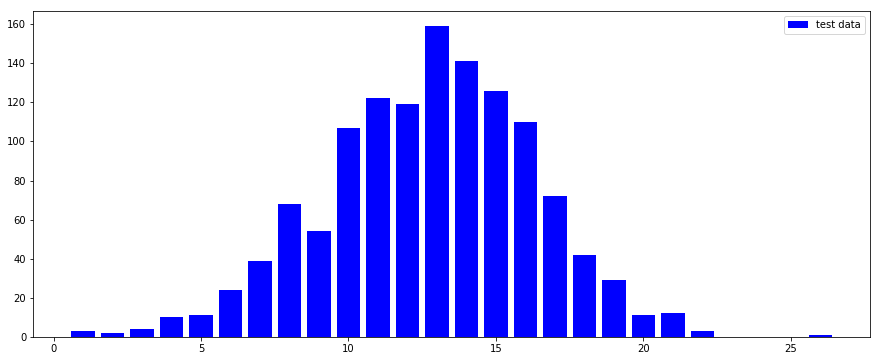

In [41]:
plt.figure(figsize=(15,6))
plt.bar(list(length_sent_test.keys()) ,
        list(length_sent_test.values()),
        color="blue",label="test data")
plt.legend()
plt.show()